In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data 2/stroke_risk_dataset_v2.csv")

df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


In [ ]:
df.columns = df.columns.str.title()
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'High_Blood_Pressure',
       'Irregular_Heartbeat', 'Shortness_Of_Breath', 'Fatigue_Weakness',
       'Dizziness', 'Swelling_Edema', 'Neck_Jaw_Pain', 'Excessive_Sweating',
       'Persistent_Cough', 'Nausea_Vomiting', 'Chest_Discomfort',
       'Cold_Hands_Feet', 'Snoring_Sleep_Apnea', 'Anxiety_Doom',
       'Stroke_Risk_Percentage', 'At_Risk'],
      dtype='object')

#EDA

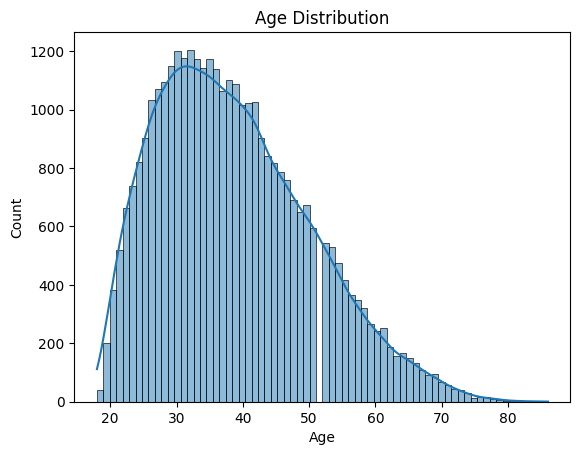

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

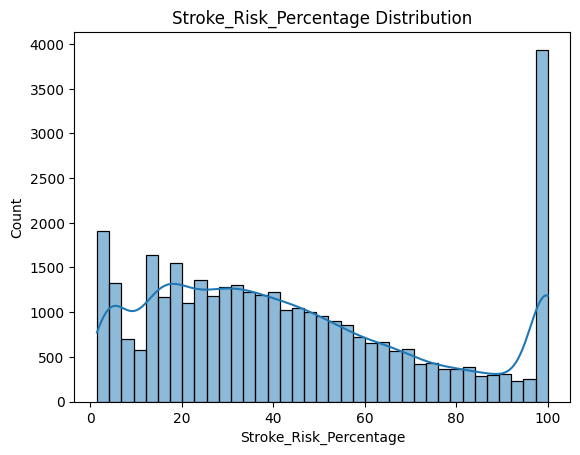

In [ ]:
sns.histplot(df['Stroke_Risk_Percentage'],kde=True)
plt.title('Stroke_Risk_Percentage Distribution')
plt.show()

In [ ]:
# Define age categories and their corresponding ranges
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'New Born'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'
# Apply the function to the 'Age' column and create a new 'AgeCategory' column
df['AgeCategory'] = df['Age'].apply(categorize_age)

# Display the updated DataFrame with the new 'AgeCategory' column
df.head()


,Age,Gender,Chest_Pain,High_Blood_Pressure,Irregular_Heartbeat,Shortness_Of_Breath,Fatigue_Weakness,Dizziness,Swelling_Edema,Neck_Jaw_Pain,Excessive_Sweating,Persistent_Cough,Nausea_Vomiting,Chest_Discomfort,Cold_Hands_Feet,Snoring_Sleep_Apnea,Anxiety_Doom,Stroke_Risk_Percentage,At_Risk,AgeCategory
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0,Adolescense
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1,Middle Aged
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1,Senior
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0,Middle Aged
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1,Middle Aged


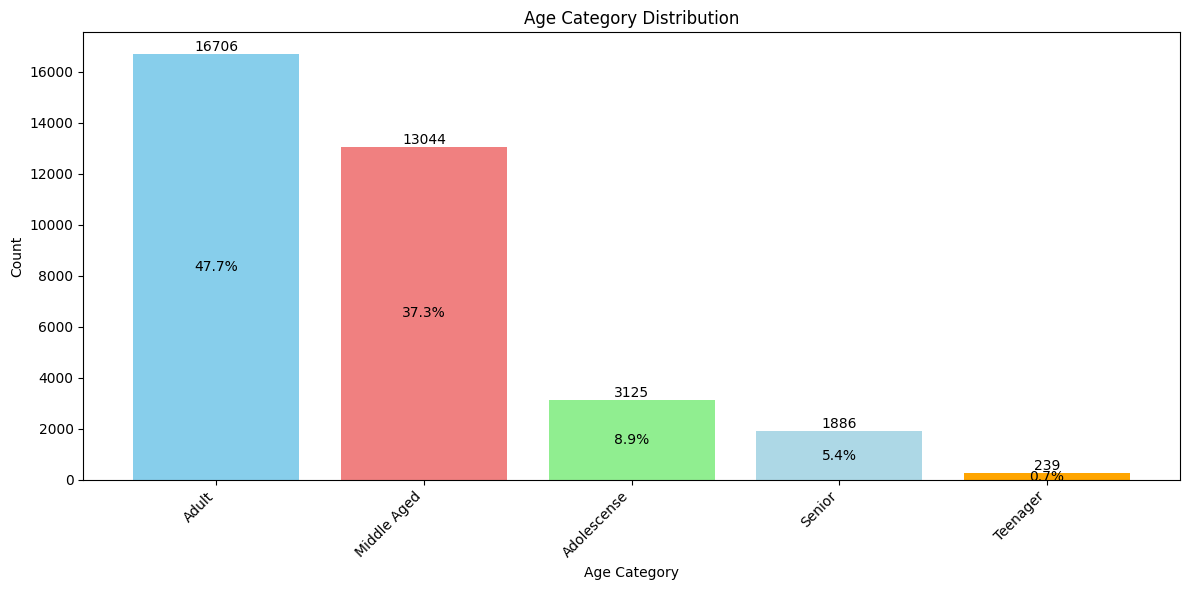

In [ ]:
# Calculate value counts and percentages for each age category
age_category_counts = df['AgeCategory'].value_counts()
age_category_percentages = (age_category_counts / len(df)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category_counts.index, age_category_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet', 'lightpink','yellow','lightgray'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, age_category_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, age_category_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
!pip install dash plotly

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
# Define columns for pie/bar charts (categorical/binary)
pie_columns = [
    'Gender', 'Chest_Pain', 'High_Blood_Pressure', 'Irregular_Heartbeat',
    'Shortness_Of_Breath', 'Fatigue_Weakness', 'Dizziness', 'Swelling_Edema',
    'Neck_Jaw_Pain', 'Excessive_Sweating', 'Persistent_Cough',
    'Nausea_Vomiting', 'Chest_Discomfort', 'Cold_Hands_Feet',
    'Snoring_Sleep_Apnea', 'Anxiety_Doom', 'At_Risk', 'AgeCategory'
]

# Filters
age_categories = df['AgeCategory'].unique()
genders = df['Gender'].unique()

# Initialize app
app = dash.Dash(__name__)
app.title = "Heart/Stroke Risk Interactive Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Heart/Stroke Risk Dashboard", style={'textAlign': 'center'}),

    # Filters
    html.Div([
        html.Div([
            html.Label("Filter by Age Category:"),
            dcc.Dropdown(
                id='age-filter',
                options=[{'label': i, 'value': i} for i in sorted(age_categories)],
                placeholder='Select Age Category',
                multi=True
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.Label("Filter by Gender:"),
            dcc.Dropdown(
                id='gender-filter',
                options=[{'label': i, 'value': i} for i in sorted(genders)],
                placeholder='Select Gender',
                multi=True
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    ], style={'marginBottom': '20px'}),

    # Tabs for chart views
    dcc.Tabs([
        dcc.Tab(label='Pie Chart View', children=[
            html.Label("Select Feature for Pie Chart:"),
            dcc.Dropdown(
                id='pie-dropdown',
                options=[{'label': col, 'value': col} for col in pie_columns],
                value='Gender',
                clearable=False,
                style={'width': '50%'}
            ),
            dcc.Graph(id='pie-chart')
        ]),

        dcc.Tab(label='Bar Chart View', children=[
            html.Label("Select Feature for Bar Chart:"),
            dcc.Dropdown(
                id='bar-dropdown',
                options=[{'label': col, 'value': col} for col in pie_columns],
                value='Chest_Pain',
                clearable=False,
                style={'width': '50%'}
            ),
            dcc.Graph(id='bar-chart')
        ]),

        dcc.Tab(label='Stroke Risk Distribution', children=[
            html.Label("Histogram of Stroke Risk Percentage"),
            dcc.Graph(id='risk-histogram')
        ]),

        dcc.Tab(label='Correlation Heatmap', children=[
            html.Br(),
            dcc.Graph(id='correlation-heatmap')
        ])
    ])
])

# Data filtering helper
def filter_data(df, age_vals, gender_vals):
    if age_vals:
        df = df[df['AgeCategory'].isin(age_vals)]
    if gender_vals:
        df = df[df['Gender'].isin(gender_vals)]
    return df

# Pie chart callback
@app.callback(
    Output('pie-chart', 'figure'),
    Input('pie-dropdown', 'value'),
    Input('age-filter', 'value'),
    Input('gender-filter', 'value')
)
def update_pie(column, age_val, gender_val):
    filtered_df = filter_data(df.copy(), age_val, gender_val)
    counts = filtered_df[column].value_counts().reset_index()
    counts.columns = [column, 'Count']
    fig = px.pie(counts, names=column, values='Count', hole=0.4,
                 title=f"Pie Chart of {column}")
    return fig

# Bar chart callback
@app.callback(
    Output('bar-chart', 'figure'),
    Input('bar-dropdown', 'value'),
    Input('age-filter', 'value'),
    Input('gender-filter', 'value')
)
def update_bar(column, age_val, gender_val):
    filtered_df = filter_data(df.copy(), age_val, gender_val)
    counts = filtered_df[column].value_counts().reset_index()
    counts.columns = [column, 'Count']
    fig = px.bar(counts, x=column, y='Count', color=column,
                 title=f"Bar Chart of {column}")
    return fig

# Histogram callback
@app.callback(
    Output('risk-histogram', 'figure'),
    Input('age-filter', 'value'),
    Input('gender-filter', 'value')
)
def update_histogram(age_val, gender_val):
    filtered_df = filter_data(df.copy(), age_val, gender_val)
    fig = px.histogram(filtered_df, x='Stroke_Risk_Percentage', nbins=20,
                       title="Distribution of Stroke Risk Percentage",
                       color='At_Risk')
    return fig

# Correlation heatmap callback
@app.callback(
    Output('correlation-heatmap', 'figure'),
    Input('age-filter', 'value'),
    Input('gender-filter', 'value')
)
def update_heatmap(age_val, gender_val):
    filtered_df = filter_data(df.copy(), age_val, gender_val)

    # Select numeric columns for correlation
    numeric_df = filtered_df.select_dtypes(include='number')
    corr = numeric_df.corr()

    fig = px.imshow(
        corr,
        text_auto=True,
        aspect="auto",
        color_continuous_scale='RdBu_r',
        title="Correlation Heatmap"
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

#Modeling Time

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")




In [ ]:
# Display basic info about the data
print("Data Overview")
print(f"Shape of the dataset: {df.shape}")
print("Data types of columns:")
print(df.dtypes)

# Quick preview of the data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Target Distribution for Classification (At_Risk)
print("\nTarget Variable Distribution (At_Risk):")
print(df['At_Risk'].value_counts())

# Target Distribution for Regression (Stroke_Risk_Percentage)
print("\nTarget Variable Distribution (Stroke_Risk_Percentage):")
print(df['Stroke_Risk_Percentage'].describe())

# Categorical Columns Analysis
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

# Value counts for categorical variables
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


Data Overview
Shape of the dataset: (35000, 20)
Data types of columns:
Age                         int64
Gender                     object
Chest_Pain                  int64
High_Blood_Pressure         int64
Irregular_Heartbeat         int64
Shortness_Of_Breath         int64
Fatigue_Weakness            int64
Dizziness                   int64
Swelling_Edema              int64
Neck_Jaw_Pain               int64
Excessive_Sweating          int64
Persistent_Cough            int64
Nausea_Vomiting             int64
Chest_Discomfort            int64
Cold_Hands_Feet             int64
Snoring_Sleep_Apnea         int64
Anxiety_Doom                int64
Stroke_Risk_Percentage    float64
At_Risk                     int64
AgeCategory                object
dtype: object

First 5 rows of the dataset:
   Age  Gender  Chest_Pain  High_Blood_Pressure  Irregular_Heartbeat  \
0   22    Male           1                    0                    0   
1   52    Male           0                    1              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# ------------------ Split data into features and targets ------------------
X = df.drop(['At_Risk', 'Stroke_Risk_Percentage'], axis=1)
X.drop('AgeCategory', axis=1, inplace=True)
y_class = df['At_Risk']
y_reg = df['Stroke_Risk_Percentage']

# ------------------ Train-test split (80/20) ------------------
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# ------------------ Encode Gender ------------------
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# ------------------ Handle Class Imbalance ------------------
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train_class)

print("Preprocessing Done!")


Preprocessing Done!


In [ ]:
X_train_ros.head()

,Age,Gender,Chest_Pain,High_Blood_Pressure,Irregular_Heartbeat,Shortness_Of_Breath,Fatigue_Weakness,Dizziness,Swelling_Edema,Neck_Jaw_Pain,Excessive_Sweating,Persistent_Cough,Nausea_Vomiting,Chest_Discomfort,Cold_Hands_Feet,Snoring_Sleep_Apnea,Anxiety_Doom
0,36,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,34,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,32,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor

import pandas as pd

def evaluate_models(X, y, task='classification'):
    results = []

    # Split the data
    stratify = y if task == 'classification' else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=stratify
    )

    if task == 'classification':
        models = [
            ('Logistic Regression', LogisticRegression(max_iter=1000)),
            ('Decision Tree', DecisionTreeClassifier()),
            ('Random Forest', RandomForestClassifier(n_jobs=-1)),
            ('Gradient Boosting', GradientBoostingClassifier()),
            ('AdaBoost', AdaBoostClassifier()),
            ('Support Vector Machine', SVC()),
            ('K-Nearest Neighbors', KNeighborsClassifier(n_jobs=-1)),
            ('Naive Bayes', GaussianNB()),
            ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)),
        ]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            results.append((name, accuracy, precision, recall, f1))

        df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
        return df_results.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')

    elif task == 'regression':
        models = [
            ('Linear Regression', LinearRegression()),
            ('Decision Tree', DecisionTreeClassifier()),  # Not great for regression, but keeping for symmetry
            ('Random Forest', RandomForestClassifier(n_jobs=-1)),
            ('Gradient Boosting', GradientBoostingClassifier()),
            ('AdaBoost', AdaBoostClassifier()),
            ('XGBoost', XGBRegressor(n_jobs=-1)),
        ]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results.append((name, mse, mae, r2))

        df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R2 Score'])
        return df_results.style.highlight_min(subset=['MSE', 'MAE'], color='lightgreen')\
                           .highlight_max(subset=['R2 Score'], color='skyblue')

    else:
        raise ValueError("Task must be either 'classification' or 'regression'")


In [ ]:
# Classification (At_Risk)
evaluate_models(X_train_ros, y_train_ros, task='classification')


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.977671,0.977701,0.977671,0.977671
1,Decision Tree,0.976258,0.976260,0.976258,0.976258
2,Random Forest,0.986150,0.986160,0.986150,0.986150
3,Gradient Boosting,0.965659,0.965779,0.965659,0.965656
4,AdaBoost,0.932024,0.932228,0.932024,0.932016
5,Support Vector Machine,0.947852,0.947912,0.947852,0.947850
6,K-Nearest Neighbors,0.922979,0.929291,0.922979,0.922695
7,Naive Bayes,0.893867,0.900025,0.893867,0.893457
8,XGBoost,0.993075,0.993084,0.993075,0.993075


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor

# ---------------------- DATA PREPROCESSING ----------------------
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

# ---------------------- SPLIT TARGETS ----------------------
# Classification target
y_class = df['At_Risk']
# Regression target
y_reg = df['Stroke_Risk_Percentage']
# Features (drop targets)
X = df.drop(['At_Risk', 'Stroke_Risk_Percentage'], axis=1)
X.drop('AgeCategory', axis=1, inplace=True)

# ---------------------- SPLIT DATA ----------------------
# Classification split with stratify + ROS
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_class, y_train_class)

# Regression split (no stratify)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("Data Preprocessing Complete!")

# ---------------------- EVALUATION FUNCTION ----------------------

def evaluate_models(X, y, task='classification'):
    results = []

    stratify = y if task == 'classification' else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=stratify
    )

    if task == 'classification':
        models = [
            ('Logistic Regression', LogisticRegression(max_iter=1000)),
            ('Decision Tree', DecisionTreeClassifier()),
            ('Random Forest', RandomForestClassifier(n_jobs=-1)),
            ('Gradient Boosting', GradientBoostingClassifier()),
            ('AdaBoost', AdaBoostClassifier()),
            ('Support Vector Machine', SVC()),
            ('K-Nearest Neighbors', KNeighborsClassifier(n_jobs=-1)),
            ('Naive Bayes', GaussianNB()),
            ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)),
        ]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            results.append((name, accuracy, precision, recall, f1))

        df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
        return df_results.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='lightblue')

    elif task == 'regression':
        models = [
                  ('Linear Regression', LinearRegression()),
                  ('Random Forest', RandomForestRegressor(n_jobs=-1)),
                  ('Gradient Boosting', GradientBoostingRegressor()),
                  ('AdaBoost', AdaBoostRegressor()),
                  ('XGBoost', XGBRegressor(n_jobs=-1)),
]



        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results.append((name, mse, mae, r2))

        df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R2 Score'])
        return df_results.style.highlight_min(subset=['MSE', 'MAE'], color='lightgreen')\
                           .highlight_max(subset=['R2 Score'], color='blue')

    else:
        raise ValueError("Task must be either 'classification' or 'regression'")



Data Preprocessing Complete!


In [ ]:
# ---------------------- RUN EVALUATIONS ----------------------

# 📊 Classification
classification_results = evaluate_models(X_train_ros, y_train_ros, task='classification')
display(classification_results)

# 📈 Regression
regression_results = evaluate_models(X_train_reg, y_train_reg, task='regression')
display(regression_results)


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.977671,0.977701,0.977671,0.977671
1,Decision Tree,0.975269,0.975269,0.975269,0.975269
2,Random Forest,0.986998,0.987008,0.986998,0.986998
3,Gradient Boosting,0.965659,0.965779,0.965659,0.965656
4,AdaBoost,0.932024,0.932228,0.932024,0.932016
5,Support Vector Machine,0.947852,0.947912,0.947852,0.947850
6,K-Nearest Neighbors,0.922979,0.929291,0.922979,0.922695
7,Naive Bayes,0.893867,0.900025,0.893867,0.893457
8,XGBoost,0.993075,0.993084,0.993075,0.993075


,Model,MSE,MAE,R2 Score
0,Linear Regression,53.196559,4.948750,0.941191
1,Random Forest,13.404254,1.856188,0.985182
2,Gradient Boosting,21.755008,3.434316,0.975950
3,AdaBoost,134.584956,9.704510,0.851216
4,XGBoost,3.695713,1.159624,0.995914


In [ ]:
# Regression (Stroke_Risk_Percentage)
evaluate_models(X_train_reg, y_train_reg, task='regression')

In [ ]:
# For Classification Evaluation (At_Risk)
classification_results = evaluate_models(X_train, y_train_class, task='classification')
display(classification_results)

# For Regression Evaluation (Stroke_Risk_Percentage)
regression_results = evaluate_models(X_train_reg, y_train_reg, task='regression')
display(regression_results)


In [ ]:
X_train_reg.info()

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# ------------------ PREPROCESSING ------------------
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Split features and targets
X = df.drop(['At_Risk', 'Stroke_Risk_Percentage'], axis=1)
y_class = df['At_Risk']
y_reg = df['Stroke_Risk_Percentage']

# Train-test splits
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, stratify=y_class, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# ------------------ REGRESSION MODEL ------------------
reg_model = XGBRegressor()
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate regression
y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Performance:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")

# Save regression model
joblib.dump(reg_model, 'stroke_risk_regression_model.pkl')

# ------------------ ENHANCE CLASSIFICATION ------------------
# Add regression output as new feature
X_train_class_enh = X_train_class.copy()
X_test_class_enh = X_test_class.copy()

# Generate regression predictions for both train and test classification sets
reg_train_preds = reg_model.predict(X_train_class)
reg_test_preds = reg_model.predict(X_test_class)

X_train_class_enh['Stroke_Risk_Pred'] = reg_train_preds
X_test_class_enh['Stroke_Risk_Pred'] = reg_test_preds

# ------------------ CLASSIFICATION MODEL ------------------
clf_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_model.fit(X_train_class_enh, y_train_class)

# Predict and evaluate classification
y_pred_class = clf_model.predict(X_test_class_enh)
print("Classification Performance:\n")
print(classification_report(y_test_class, y_pred_class))

# Save classification model
joblib.dump(clf_model, 'stroke_risk_classification_model.pkl')


In [ ]:
joblib.dump(le, 'gender_label_encoder.pkl')


In [ ]:
# Save the feature columns used for training
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, 'model_feature_columns.pkl')


In [ ]:
feature_columns

In [ ]:
# Checking the columns of the training data to see what was used during model training
print(f"Training data columns: {X.columns}")
